In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.model_selection import train_test_split

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Test set:", test_images.shape, test_labels.shape)
print("Training set:", train_images.shape, train_labels.shape)
# print("Validation set:", validation_images.shape, validation_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
Test set: (10000, 28, 28) (10000,)
Training set: (60000, 28, 28) (60000,)


In [3]:
# The classname of the Dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Each image is mapped to a single label inside this list above.

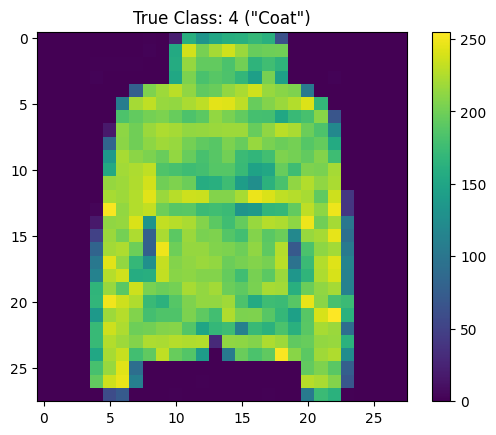

In [4]:
# Show the train data at index position 0
plt.figure()
index_rand = np.random.randint(0, len(train_images)) #.......................... Select an image's index at random, and save it to index_rand
plt.imshow(train_images[index_rand]) #.......................................... Show the image at the random index you randomly selected above
numerical_label = train_labels[index_rand] # ................................... Save the label number of the randomly selected image
text_description = class_names[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))
plt.colorbar()
plt.show()

In [5]:
# Standard Scale the train and test image set
# Scale these values to a range of 0 to 1 before feeding them to the neural network model.
# There are 255 pixels, hence to scale, divide the values by 255.

train_images = train_images / 255.0
test_images = test_images / 255.0

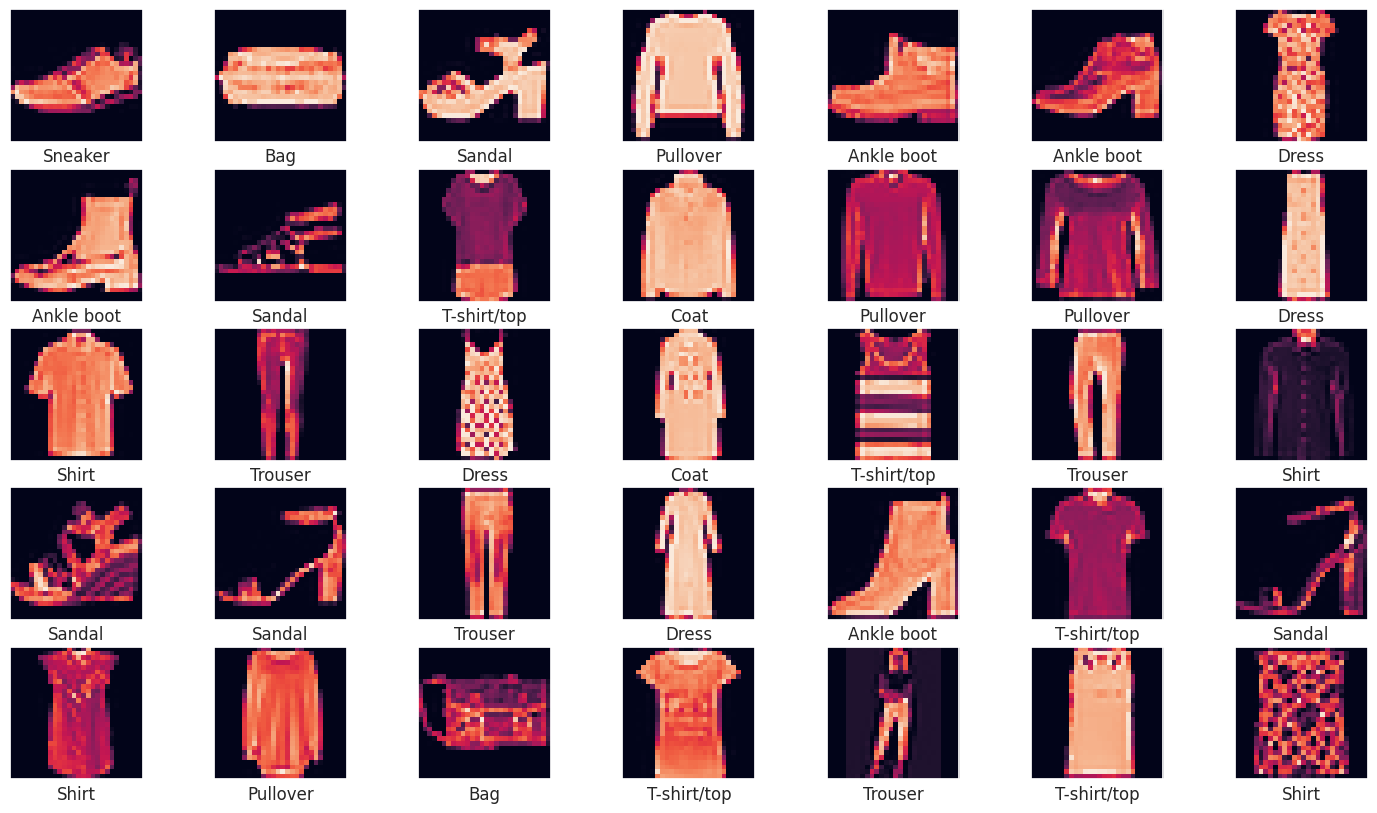

In [6]:
# Display the classes in the train image sets

plt.figure(figsize=(18,10))
sns.set(style = 'darkgrid')
for i in range(35):
    plt.subplot(5,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    rand_int = np.random.randint(0, 50000)
    plt.imshow(train_images[rand_int])
    plt.xlabel(class_names[train_labels[rand_int]])
plt.show()

In [7]:
model = tf.keras.Sequential([ #........................ Instantiate the model creating class.
    tf.keras.layers.Flatten(input_shape=(28, 28)), #... Flatten out the image from 28 by 28 pixels to a one dimensional 784 pixels
    tf.keras.layers.Dense(128, activation='relu'), #... Add the first 128 layer, and instantiate the activation to be used.
    tf.keras.layers.Dense(10, activation='softmax')#.The second (last) layer which comprises of the number of possible outcomes. 10 outcomes in this case
])

model.compile(optimizer='adam', # ..................... The optimizer that adjusts weight and bias for a given neuron
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #...... Loss calculates the error of the prediction
              metrics=['accuracy']) #.................. Accuracy calculates the precision of the prediction.

model.fit(train_images, train_labels, epochs = 10) #..... Fit the model on the dataset and define the number of epochs

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 11s 4ms/step - loss: 0.5032 - accuracy: 0.8226
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3782 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3378 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3138 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2965 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2812 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2686 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2593 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2480 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2391 - accur

In [8]:
# Evaluate the performance
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3452 - accuracy: 0.8786 - 706ms/epoch - 2ms/step

Test accuracy: 0.878600001335144


In [9]:
# Make predictions for each image in the test image set.
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions[0]) #.... This will print out 10 arrays of prediction which corresponds to the 10 classes of images
maximum = np.argmax(predictions[0])

print(f"\n The model predicted that first test image is of class {np.argmax(predictions[0])}")

313/313 [==============================] - 2s 5ms/step
[0.08540798 0.08540794 0.08540794 0.08540794 0.08540794 0.08541873
 0.08540794 0.08588695 0.08540794 0.23083869]

 The model predicted that first test image is of class 9
